In [1]:
pip install httpx parsel loguru

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install requests-html

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install pyppdf

In [4]:
pip install --upgrade pywin32==228 --user

In [2]:
from selenium import webdriver
from lxml import html
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [97]:
pip install --upgrade urllib3

Note: you may need to restart the kernel to use updated packages.Collecting urllib3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
docker 6.0.0 requires pywin32>=304; sys_platform == "win32", but you have pywin32 228 which is incompatible.



  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9


In [3]:
def make_image(data):
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(data)
    plt.plot()
    plt.show()
    
def scrap_product(url,deep=0,name="scrapped_data"):
    if deep==0 : 
        globals()[f"driver_{deep}"] = webdriver.Chrome('/tmp/chromedriver')
        globals()[f"driver_{deep}"].get(url)
        globals()[f"url_{deep}"] = url
        globals()[f"tree_{deep}"] = html.fromstring(globals()[f"driver_{deep}"].page_source)
        globals()[f"title_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-title']/h1[@class='product-title-text']/text()")
        print(globals()[f"title_{deep}"])
        globals()[f"price_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-price']/div[@class='product-price-current']/span[@class='product-price-value']/text()")
        if globals()[f"price_{deep}"] == []:
            globals()[f"price_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='uniform-banner']/div[@class='uniform-banner-box']/div[1]/span[@class='uniform-banner-box-price']/text()")
        
            
        print(globals()[f"price_{deep}"])
        globals()[f"average_note_{deep}"]= globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/div[@class='overview-rating']/span[@class='overview-rating-average']/text()")
        if globals()[f"average_note_{deep}"]==[]:
            globals()[f"average_note_{deep}"]=[""]
        print(globals()[f"average_note_{deep}"])
        globals()[f"number_of_comment_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/span[@class='product-reviewer-reviews black-link']/text()")
        if globals()[f"number_of_comment_{deep}"] ==[]:
            globals()[f"number_of_comment_{deep}"] =[""]
        print(globals()[f"number_of_comment_{deep}"])
        globals()[f"number_of_sales_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/span[@class='product-reviewer-sold']/text()")
        print(globals()[f"number_of_sales_{deep}"])
        if globals()[f"number_of_sales_{deep}"]==[]:
            globals()[f"number_of_sales_{deep}"]=[""]
        globals()[f"estimation_livraison_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-dynamic-shipping']/div/div[@class='dynamic-shipping']/div[@class='dynamic-shipping-line dynamic-shipping-contentLayout'][2]/span/span[2]/text()")
        print(globals()[f"estimation_livraison_{deep}"])
        if globals()[f"estimation_livraison_{deep}"] ==[]:
            globals()[f"estimation_livraison_{deep}"] =[""]
        globals()[f"product_video_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='img-view-wrap']/div/div[@class='image-viewer']/div[@class='video-container']/img[@id='poster']/@src")
        globals()[f"product_image_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='img-view-wrap']/div/div[@class='image-viewer']/div[@class='image-view-magnifier-wrap']/img")[0].attrib.get('src')
        if globals()[f"product_video_{deep}"]!=[] : 
            globals()[f"product_picture_{deep}"] = globals()[f"product_video_{deep}"]
#             print(globals()[f"product_picture_{deep}"])
            globals()[f"response_{deep}"]= requests.get(globals()[f"product_video_{deep}"][0])
            globals()[f"img_{deep}"]= Image.open(BytesIO(globals()[f"response_{deep}"].content))
            make_image(globals()[f"img_{deep}"])
        else :
            globals()[f"product_picture_{deep}"] = [globals()[f"product_image_{deep}"]]
#             print(globals()[f"product_picture_{deep}"])
            globals()[f"response_{deep}"]= requests.get(globals()[f"product_image_{deep}"])
            globals()[f"img_{deep}"]= Image.open(BytesIO(globals()[f"response_{deep}"].content))
            make_image(globals()[f"img_{deep}"])
        globals()[f"urls_{deep}"] = set()
        print("Similar product : " if deep==0 else "\n")
        globals()[f"block_{deep}"] = [a.get_attribute('href') for a in globals()[f"driver_{deep}"].find_elements(By.CSS_SELECTOR, 'a[href*="/item/"]')]
        globals()[f"urls_{deep}"].update(globals()[f"block_{deep}"])
        globals()[f"driver_{deep}"].execute_script("window.scrollBy(0, arguments[0]);", 600)
        for i in range(1,5): 
            if 'https://www.aliexpress.com/item/' in list(globals()[f"urls_{deep}"])[i]:
#                 print(i+deep)
#                 print(list(globals()[f"urls_{deep}"])[i])
                scrap_product(list(globals()[f"urls_{deep}"])[i],i+deep)
#                 scrap_product(list(globals()[f"urls_{deep}"])[i],4+deep)
#                print(i+deep)
#                print(list(globals()[f"urls_{deep}"])[i])
    elif deep<4 : 
        globals()[f"driver_{deep}"] = webdriver.Chrome('/tmp/chromedriver')
        globals()[f"driver_{deep}"].get(url)
        globals()[f"url_{deep}"] = url
        globals()[f"tree_{deep}"] = html.fromstring(globals()[f"driver_{deep}"].page_source)
        globals()[f"title_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-title']/h1[@class='product-title-text']/text()")
        print(globals()[f"title_{deep}"])
        globals()[f"price_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-price']/div[@class='product-price-current']/span[@class='product-price-value']/text()")
        if globals()[f"price_{deep}"] == []:
            globals()[f"price_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='uniform-banner']/div[@class='uniform-banner-box']/div[1]/span[@class='uniform-banner-box-price']/text()")
        
            
        print(globals()[f"price_{deep}"])
        globals()[f"average_note_{deep}"]= globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/div[@class='overview-rating']/span[@class='overview-rating-average']/text()")
        if globals()[f"average_note_{deep}"]==[]:
            globals()[f"average_note_{deep}"]=[""]
        print(globals()[f"average_note_{deep}"])
        globals()[f"number_of_comment_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/span[@class='product-reviewer-reviews black-link']/text()")
        if globals()[f"number_of_comment_{deep}"] ==[]:
            globals()[f"number_of_comment_{deep}"] =[""]
        print(globals()[f"number_of_comment_{deep}"])
        globals()[f"number_of_sales_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-reviewer']/span[@class='product-reviewer-sold']/text()")
        print(globals()[f"number_of_sales_{deep}"])
        if globals()[f"number_of_sales_{deep}"]==[]:
            globals()[f"number_of_sales_{deep}"]=[""]
        globals()[f"estimation_livraison_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='product-info']/div[@class='product-dynamic-shipping']/div/div[@class='dynamic-shipping']/div[@class='dynamic-shipping-line dynamic-shipping-contentLayout'][2]/span/span[2]/text()")
        print(globals()[f"estimation_livraison_{deep}"])
        if globals()[f"estimation_livraison_{deep}"] ==[]:
            globals()[f"estimation_livraison_{deep}"] =[""]
        globals()[f"product_video_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='img-view-wrap']/div/div[@class='image-viewer']/div[@class='video-container']/img[@id='poster']/@src")
        globals()[f"product_image_{deep}"] = globals()[f"tree_{deep}"].xpath("/html/body[@class='fra-detail-page']/div[@id='root']/div[@class='glodetail-wrap']/div[@class='product-main']/div[@class='product-main-wrap']/div[@class='img-view-wrap']/div/div[@class='image-viewer']/div[@class='image-view-magnifier-wrap']/img")[0].attrib.get('src')

        if globals()[f"product_video_{deep}"]!=[] : 
            globals()[f"product_picture_{deep}"] = globals()[f"product_video_{deep}"]
            print(globals()[f"product_picture_{deep}"])
            globals()[f"response_{deep}"]= requests.get(globals()[f"product_video_{deep}"][0])
            globals()[f"img_{deep}"]= Image.open(BytesIO(globals()[f"response_{deep}"].content))
            make_image(globals()[f"img_{deep}"])
        else :
            globals()[f"product_picture_{deep}"] = [globals()[f"product_image_{deep}"]]
#             print(globals()[f"product_picture_{deep}"])
            globals()[f"response_{deep}"]= requests.get(globals()[f"product_image_{deep}"])
            globals()[f"img_{deep}"]= Image.open(BytesIO(globals()[f"response_{deep}"].content))
            make_image(globals()[f"img_{deep}"])
    else :
        globals()[f"data"]= {"Website":[],"Link":[],"Product_name":[],"Prices":[],"Rate":[],"Number_of_comment":[],"Number_of_sales":[],"Estimated_delivry":[],"Picture":[]}
#         print(data)
        for i in range(0,4):
            globals()[f"data"]["Website"]+=["AliExpress"]
            globals()[f"data"]["Link"]+=[globals()[f"url_{i}"]]
            globals()[f"data"]["Product_name"]+=globals()[f"title_{i}"]
            globals()[f"data"]["Prices"]+=globals()[f"price_{i}"]
            globals()[f"data"]["Rate"]+=globals()[f"average_note_{i}"]
            globals()[f"data"]["Number_of_comment"]+=globals()[f"number_of_comment_{i}"]
            globals()[f"data"]["Number_of_sales"]+=globals()[f"number_of_sales_{i}"]
            globals()[f"data"]["Estimated_delivry"]+=globals()[f"estimation_livraison_{i}"]
            globals()[f"data"]["Picture"]+=globals()[f"product_picture_{i}"]
#        

C:\Users\fanny\AppData\Local\Temp\ipykernel_4600\3682679886.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  globals()[f"driver_{deep}"] = webdriver.Chrome('/tmp/chromedriver')


['Oreiller Long et Doux en forme de Chat 50/70/90/110/130 cm, Jouets en Peluche de Bureau Idéal pour la Sieste, Coussin de Confort pour la Maison, Cadeau Décoratif pour Enfant']
['€ 1,68']
['4.7']
['307 Avis']
['1682 Commandes']
['15 fév.']


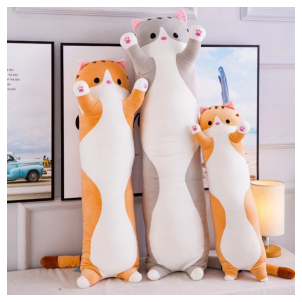

Similar product : 


C:\Users\fanny\AppData\Local\Temp\ipykernel_4600\3682679886.py:68: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  globals()[f"driver_{deep}"] = webdriver.Chrome('/tmp/chromedriver')


['Peluche pokémon Pikachu, jouets en peluche mobiles, Kawaii, Eevee, Charmander, carapuce, collection cadeaux, poupée pour garçons et enfants']
['€ 0,09']
['4.8']
['200 Avis']
['547 Commandes']
['20 mars.']


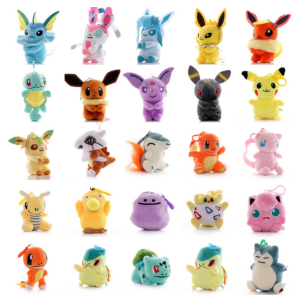

['Chat en peluche doux et mignon de 10 cm, jouet en peluche, pendentif, clé, sac de voiture, suspension, bijoux, cadeau pour enfants']
['€ 0,09']
['4.9']
['77 Avis']
['465 Commandes']
['20 mars.']


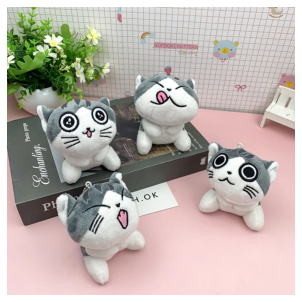

["Jouet de Simulation de tigre en peluche pour bébé, peluche douce, Animal sauvage de la forêt, poupée d'oreiller, cadeau d'anniversaire pour enfants, 23cm"]
['€ 1,81']
['4.7']
['103 Avis']
['685 Commandes']
['20 mars.']


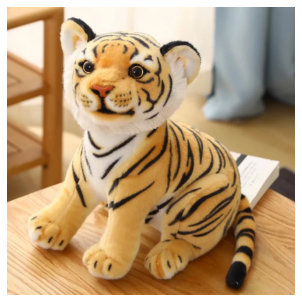

ici


,Website,Link,Product_name,Prices,Rate,Number_of_comment,Number_of_sales,Estimated_delivry,Picture
0,AliExpress,https://fr.aliexpress.com/item/100500295494098...,Oreiller Long et Doux en forme de Chat 50/70/9...,"€ 1,68",4.7,307 Avis,1682 Commandes,15 fév.,https://ae01.alicdn.com/kf/H23c266bab9bc4cbcb8...
1,AliExpress,https://www.aliexpress.com/item/10050039611638...,"Peluche pokémon Pikachu, jouets en peluche mob...","€ 0,09",4.8,200 Avis,547 Commandes,20 mars.,https://ae01.alicdn.com/kf/S3086792e834e4857aa...
2,AliExpress,https://www.aliexpress.com/item/10050031720532...,"Chat en peluche doux et mignon de 10 cm, jouet...","€ 0,09",4.9,77 Avis,465 Commandes,20 mars.,https://ae01.alicdn.com/kf/H4b545421face4149bc...
3,AliExpress,https://www.aliexpress.com/item/10050037359454...,Jouet de Simulation de tigre en peluche pour b...,"€ 1,81",4.7,103 Avis,685 Commandes,20 mars.,https://ae01.alicdn.com/kf/Hb4bf913507be4dd781...


In [48]:
scrap_product("https://fr.aliexpress.com/item/1005002954940984.html?spm=a2g0o.productlist.0.0.4cacde9aYWOid1&algo_pvid=21685727-a0a6-443e-994d-050b7fc98450&aem_p4p_detail=20221228105932732939780198220007917803&algo_exp_id=21685727-a0a6-443e-994d-050b7fc98450-4&pdp_ext_f=%7B%22sku_id%22%3A%2212000027804671795%22%7D&pdp_npi=2%40dis%21EUR%217.69%215.77%21%21%21%21%21%402100bdde16722539720031558eaf78%2112000027804671795%21sea&curPageLogUid=QpmhOsyRzPDZ&ad_pvid=20221228105932732939780198220007917803_5&ad_pvid=20221228105932732939780198220007917803_5")
df = pd.DataFrame(data) 
df

In [49]:
data

{'Website': ['AliExpress', 'AliExpress', 'AliExpress', 'AliExpress'],
 'Link': ['https://fr.aliexpress.com/item/1005002954940984.html?spm=a2g0o.productlist.0.0.4cacde9aYWOid1&algo_pvid=21685727-a0a6-443e-994d-050b7fc98450&aem_p4p_detail=20221228105932732939780198220007917803&algo_exp_id=21685727-a0a6-443e-994d-050b7fc98450-4&pdp_ext_f=%7B%22sku_id%22%3A%2212000027804671795%22%7D&pdp_npi=2%40dis%21EUR%217.69%215.77%21%21%21%21%21%402100bdde16722539720031558eaf78%2112000027804671795%21sea&curPageLogUid=QpmhOsyRzPDZ&ad_pvid=20221228105932732939780198220007917803_5&ad_pvid=20221228105932732939780198220007917803_5',
  'https://www.aliexpress.com/item/1005003961163838.html?gps-id=pcDetailBottomMoreThisSeller&scm=1007.13339.291025.0&scm_id=1007.13339.291025.0&scm-url=1007.13339.291025.0&pvid=8ec72d46-2741-4e2e-8851-9f24d2b99ae7&_t=gps-id:pcDetailBottomMoreThisSeller,scm-url:1007.13339.291025.0,pvid:8ec72d46-2741-4e2e-8851-9f24d2b99ae7,tpp_buckets:668%232846%238107%231934&pdp_ext_f=%7B%22sku_i